# Naive Agent in the NumberLine Environment

This is the simplest agent exploring the Numberline environment. The Naive agent moves randomly and memorizes where it has been in a tree. The NumberLine environment has 5 available actions corresponding to +0 +1 -1 +10 and -9, with these five actions the naïve agent traverses the natural numbers. Once it has explored at random for 1000 actions you can ask it to move anywhere on the number line it has seen before: moving on the number line is exactly the same thing as manipulating the environment since in this environment the only thing the agent can manipulate is it's position in the environment. Still, no matter the complexity of the environment the agent can be thought of as merely traversing its state-space just as it traverses the natural numbers in this simple environment.

First we import the agent and the environment...

In [1]:
from sensorimotor.agents import NaiveSensorimotor
from sensorimotor.envs import FiniteNumberLine

import time

Initialize the Environment and the Agent...

In [2]:
env = FiniteNumberLine()
agent = NaiveSensorimotor(env)

Training: allow the agent to explore (at random in this case)...

In [3]:
agent.train(verbose=True)

() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0
() 0


True

In [7]:
import anytree
anytree.search.findall(agent.root, filter_=lambda node: node.name == 1 and node.edge == 0)

(Node('/root/0/0/1/2/3/2/3/0/0/1/2/0/1/0/1/0/0/0/1/1', edge=0),
 Node('/root/0/0/1/2/3/2/3/0/0/1/2/0/1/0/1/0/0/0/1/1/0/0/0/1/0/0/0/0/10/11/10/11/10/9/8/18/18/28/38/37/45/46/46/37/36/37/38/38/45/44/44/35/36/27/27/37/45/55/56/66/66/76/86/86/85/76/77/77/77/78/69/70/71/62/63/54/45/44/43/42/42/41/40/31/30/21/20/21/21/20/21/12/3/0/0/0/10/10/20/30/29/30/40/40/31/30/21/20/30/40/40/45/45/45/45/55/65/66/65/64/65/66/76/86/87/78/77/77/78/79/89/90/89/90/90/90/91/82/73/73/64/63/62/72/72/71/62/63/64/64/74/75/66/66/67/66/65/75/75/74/65/56/56/66/76/76/76/67/68/69/70/71/81/72/82/73/64/74/84/83/83/93/93/93/94/94/93/84/75/75/76/77/76/75/85/76/75/74/75/85/76/67/58/59/51/42/41/42/33/43/53/54/55/51/42/33/33/32/31/32/31/41/51/61/62/62/61/52/51/52/52/52/52/43/42/33/33/24/25/35/45/45/44/54/64/63/63/63/62/61/71/70/61/61/62/63/63/73/83/82/92/93/84/85/85/84/94/95/96/95/94/100/100/100/100/100/91/100/100/99/99/98/89/89/80/81/81/81/72/73/74/75/85/85/85/86/87/78/77/68/59/51/42/42/41/32/23/24/15/6/6/0/0/0/0/0/0/10/10/9

In [30]:
!apt-get update -y
!apt-get install graphviz -y

Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [52.1 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8780 kB]
Get:5 http://deb.debian.org/debian bookworm-updates/main amd64 Packages [6408 B]
Get:6 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [86.2 kB]
Fetched 9124 kB in 2s (4460 kB/s)                          
Reading package lists... Done
N: Repository 'http://deb.debian.org/debian bookworm InRelease' changed its 'Version' value from '12.0' to '12.2'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core fonts-liberation2
  libabsl20220623 libann0 libaom3 libavif15 libcairo2 libcdt5 libcgraph6
  libdatrie1 libdav1d6 libde265-0 libdefla

In [38]:
!apt-get install xdg-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dbus dbus-bin dbus-daemon dbus-session-bus-common dbus-system-bus-common
  libapparmor1 libauthen-sasl-perl libclone-perl libdata-dump-perl libdbus-1-3
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libegl-mesa0 libegl1 libelf1 libencode-locale-perl
  libfile-basedir-perl libfile-desktopentry-perl libfile-listing-perl
  libfile-mimeinfo-perl libfont-afm-perl libfontenc1 libgbm1 libgl1
  libgl1-mesa-dri libglapi-mesa libgles2 libglvnd0 libglx-mesa0 libglx0
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl
  libio-stringy-perl libipc-system-simple-perl libllvm15
  liblwp-mediatypes-perl liblwp-protocol-https-

In [43]:
# I'm not using anytree correctly. nodes are the entire path, very inefficient. Perhaps I can use these graphs to map it... idk.
# otherwise just go back to table structure.
import anytree

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = {}

    def add_node(self, name):
        self.nodes[name] = anytree.Node(name)

    def add_edge(self, node1_name, node2_name, edge_label):
        edge_key = (node1_name, node2_name, edge_label)
        self.edges[edge_key] = (self.nodes[node1_name], self.nodes[node2_name])
        
    def visualize(self):
        dot = Digraph(comment='The Round Table')
        for name, node in self.nodes.items():
            dot.node(name)
        for edge_key, (node1, node2) in self.edges.items():
            _, _, label = edge_key
            dot.edge(node1.name, node2.name, label=label)
        return dot # dot.visualize(); dot.render('output', view=True)

    def render(self, filename):
        dot = Digraph(format='png')
        for name, node in self.nodes.items():
            dot.node(name)
        for edge_key, edge_value in self.edges.items():
            name1, name2, = edge_key[0], edge_key[1]
            edge_label = edge_key[2]
            dot.edge(name1, name2, label=edge_label)
        #return dot # dot.visualize(); dot.render('output', view=True)
        dot.render(filename, view=True)

# Usage:

In [44]:
graph = Graph()

# Add nodes
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')

# Add edges
graph.add_edge('A', 'B', 'x')
graph.add_edge('A', 'C', 'y')
graph.add_edge('A', 'A', 'z')
graph.add_edge('B', 'C', 'j')

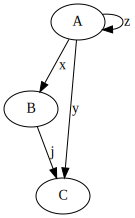

In [45]:
graph.visualize()

In [17]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [18]:
from graphviz import Digraph

In [12]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_edge',
 'add_node',
 'edges',
 'nodes']

Since this is a finite environment and we know it we can tell the agent to train until it isn't getting any suprise anymore

In [ ]:
agent.fully_train(verbose=False)

Now that it's done training, (via it's random walk) inspect which state of the environment it ended up on...

In [ ]:
#entire_tree = agent.previous
final_state = agent.previous.name
final_state

Let's look at a state of the environment it visited prior to its current location...

In [ ]:
three_b4_final = agent.previous.parent.parent.parent.name
three_b4_final

Let's inspect how it got there by looking at the full detail of this node (the naive agent makes an explicit memory everytime it sees a new state)...

In [ ]:
agent.previous

Notice the last action it took (to get to its current state) is listed as 'edge' above.
```
    0 = do nothing
    1 = +1
    2 = -1
    3 = +10
    4 = -9
```
And let's ask the agent to figure out how to get from somehting it has seen before to the last state of the environment that it saw...

In [ ]:
print('going from', three_b4_final, 'to', final_state, 'using the environment actions...')
print(agent.get_path(target=final_state, start=three_b4_final))
print('...which correspond to...')
print([
    {0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(action, '+0')
    for action in agent.get_path(target=final_state, start=three_b4_final)])

Pretty cool, the agent knows how to manipulate the environment from one state to produce another state (that is, it knows how to traverse the state space of the environment, at least in this case)...

Now let's actually ask it to do so. We'll reset the state to something it has seen before...

In [ ]:
agent.reset(three_b4_final)

Then we'll ask it to execute the steps to get to the last state of the environment saw...

In [ ]:
agent.do(final_state, verbose=True)

Let's try a longer environment manipulation: from the first thing the agent ever saw to the last thing the agent ever saw...

In [ ]:
print(agent.get_path(target=final_state, start=14))

The above action-path may be less than 1000 steps, this is because the agent looks for the shortest path it has ever seen between the two state representations.

In [ ]:
x = -21
for i in agent.get_path(target=final_state, start=14):
    print(eval(str(x)+{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(i, '+0')))

In [ ]:
eval(''.join(['-21'] + [{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(x, '+0') for x in agent.get_path(target=final_state, start=14)]))

We'll close the environment...

In [ ]:
env.close()

## Review

The naive agent makes explicit memory, it doesn't generalize in any way. It doesn't understand patterns. It can't detect that this one kind of action is exactly the opposite from another kind of action. It can't extrapolate or draw conclusions. It is not intelligent.

If the environment is small the agent is able to memorize the environment and produce any configuration of it that you would like. This is the essential role of any sensorimotor inference engine: that it can manipulate the environment it is connected to merely by you showing it the state of the environment you would like to see.

In order to achieve scale such that a Sensorimotor agent can manipulate any size and complexity of a deterministic environment we need to infuse it with more intelligence.

In [ ]:
import anytree
print(anytree.RenderTree(
    agent.root,
    #style=anytree.render.AsciiStyle()
    )
 )